In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [113]:
train_2016 = pd.read_csv('/content/drive/My Drive/データ解析コンペ/Nishika/Jリーグプレイヤーの出場時間予測/train_2016.csv')
train_2017 = pd.read_csv('/content/drive/My Drive/データ解析コンペ/Nishika/Jリーグプレイヤーの出場時間予測/train_2017.csv')
train_2018 = pd.read_csv('/content/drive/My Drive/データ解析コンペ/Nishika/Jリーグプレイヤーの出場時間予測/train_2018.csv')
test = pd.read_csv('/content/drive/My Drive/データ解析コンペ/Nishika/Jリーグプレイヤーの出場時間予測/test.csv')
team = pd.read_csv('/content/drive/My Drive/データ解析コンペ/Nishika/Jリーグプレイヤーの出場時間予測/team.csv')
coach = pd.read_csv('/content/drive/My Drive/データ解析コンペ/Nishika/Jリーグプレイヤーの出場時間予測/coach.csv')
sub = pd.read_csv('/content/drive/My Drive/データ解析コンペ/Nishika/Jリーグプレイヤーの出場時間予測/sample_submission.csv')

Merge Dataframe

In [114]:
team.rename(columns = {'team_name':'team'}, inplace = True)
team_2019 = team.query('year == 2019')
team_2018 = team.query('year == 2018')
team_2017 = team.query('year == 2017')
team_2016 = team.query('year == 2016')

In [115]:
train_2016 = pd.merge(train_2016, team_2016[['div', 'team']], how = 'inner', on = 'team')
train_2017 = pd.merge(train_2017, team_2017[['div', 'team']], how = 'inner', on = 'team')
train_2018 = pd.merge(train_2018, team_2018[['div', 'team']], how = 'inner', on = 'team')
test = pd.merge(test, team_2019[['div', 'team']], how = 'inner', on = 'team')

In [116]:
train = pd.concat([train_2016, train_2017, train_2018], sort = False)

data = pd.concat([train, test], sort = False)

欠損値 埋め

In [117]:
list = ['is_youth', 'nationality', 'j1_total_num_played', 'j1_total_scores', 'j2_total_num_played', 'j2_total_scores',
        'j3_total_num_played', 'j3_total_scores', 'na_total_num_played', 'na_total_scores']
for i in list:
  if i == 'nationality':
    data[i].fillna('japan', inplace = True)
  else:
    data[i].fillna(0, inplace = True)

list = ['salary', 'prev3_num_played',
       'prev2_num_played', 'prev1_num_played', 'prev3_scores', 'prev2_scores',
       'prev1_scores', 'prev3_time_played', 'prev2_time_played',
       'prev1_time_played']
for i in list:
  data[i].replace('-', '0', inplace = True)

特徴量作成

In [118]:
data = pd.concat([data, pd.to_datetime(data['birthdate']).dt.year], axis = 1).rename(columns = {'birthdate':'birth_year'})

不要カラム削除

In [119]:
data.drop(data.columns[6], axis = 1, inplace = True)

In [120]:
data.drop(columns = ['name', 'No', 'prev3_team', 'prev2_team', 'prev1_team', 'prev3_team', 'prev2_team', 
           'prev1_team', 'prev3_div', 'prev2_div', 'prev1_div', 'div'], inplace = True)

Standalization

In [121]:
from sklearn.preprocessing import StandardScaler
list = ['height', 'weight', 'salary', 'nth_year',
       'j1_total_num_played', 'j1_total_scores', 'j2_total_num_played',
       'j2_total_scores', 'j3_total_num_played', 'j3_total_scores',
       'na_total_num_played', 'na_total_scores', 'prev3_num_played',
       'prev2_num_played', 'prev1_num_played', 'prev3_scores', 'prev2_scores',
       'prev1_scores', 'prev3_time_played', 'prev2_time_played',
       'prev1_time_played']

scaler = StandardScaler()
scaler.fit(data[list])

data[list] = scaler.transform(data[list])

Label Encoding

In [122]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data[['team', 'position', 'nationality']] = data[['team', 'position', 'nationality']].apply(le.fit_transform)

Correlation

In [ ]:
data.corr()

One Hot Encoding

In [40]:
data = pd.get_dummies(data, columns = {'team', 'position', 'is_youth', 'nationality'})

Changing the data type

In [41]:
list = ['position_0', 'position_1', 'position_2',
       'position_3', 'is_youth_0.0', 'is_youth_1.0', 'nationality_0',
       'nationality_1', 'nationality_2', 'nationality_3', 'nationality_4',
       'nationality_5', 'nationality_6', 'nationality_7', 'nationality_8',
       'nationality_9', 'nationality_10', 'nationality_11', 'nationality_12',
       'nationality_13', 'nationality_14', 'nationality_15', 'nationality_16',
       'nationality_17', 'nationality_18', 'nationality_19', 'nationality_20',
       'nationality_21', 'nationality_22', 'nationality_23', 'nationality_24',
       'nationality_25', 'nationality_26', 'nationality_27', 'nationality_28',
       'nationality_29', 'nationality_30', 'nationality_31', 'nationality_32',
       'nationality_33', 'team_0', 'team_1', 'team_2', 'team_3', 'team_4',
       'team_5', 'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11',
       'team_12', 'team_13', 'team_14', 'team_15', 'team_16', 'team_17',
       'team_18', 'team_19', 'team_20', 'team_21', 'team_22', 'team_23']

for i in list:
  data[i] = data[i].astype(np.int8)

list = ['salary', 'prev3_num_played',
       'prev2_num_played', 'prev1_num_played', 'prev3_scores', 'prev2_scores',
       'prev1_scores', 'prev3_time_played', 'prev2_time_played',
       'prev1_time_played']

for i in list:
  data[i] = data[i].astype(np.int16)

分解

In [43]:
train = data[:len(train)]
test = data[len(train):]

In [44]:
y = train['time_played']
X_train = train.drop('time_played', axis = 1)
X_test = test.drop('time_played', axis = 1)

Modeling

In [45]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, ElasticNetCV, Lasso, LassoCV, LassoLarsCV, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

868.780914160005


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2913960.646013856, tolerance: 117438.02073527854
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2913061.6340167522, tolerance: 117438.02073527854
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37811260.91301215, tolerance: 119691.48554818738
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to in

874.3679678325592


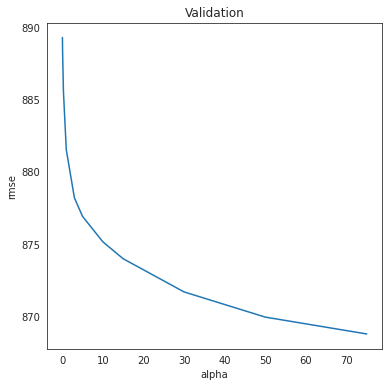

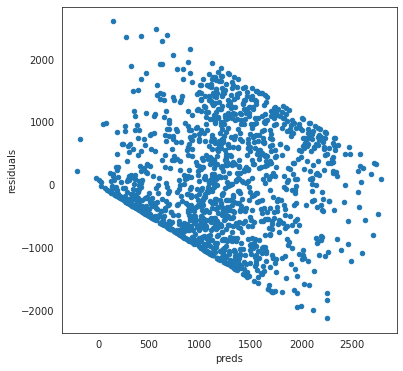

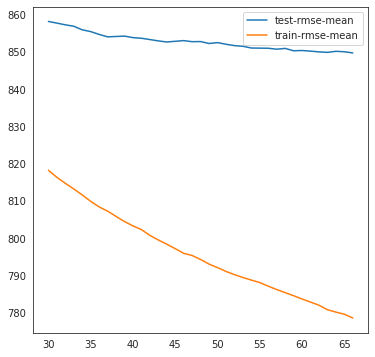

In [46]:
kf = KFold(n_splits=12, random_state=42, shuffle=True)
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

print(cv_ridge.min())

model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
print(rmse_cv(model_lasso).mean())

#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

dtrain = xgb.DMatrix(X_train, label = y)
params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [47]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Setup models
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

# Get cross validation scores for each model
scores = {}

score = rmse_cv(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

score = rmse_cv(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

score = rmse_cv(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

score = rmse_cv(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

score = rmse_cv(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

score = rmse_cv(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

lightgbm: 878.0555 (56.2473)
[01:35:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:36:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:36:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:36:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:36:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:36:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.35637e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.28959e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.31931e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.37985e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.56066e-20): result may not be accurate.
  overwrite_a=True).T


ridge: 868.3714 (37.8972)
rf: 849.2041 (47.1378)
gbr: 879.4457 (51.3697)


TypeError: ignored

<Figure size 1728x864 with 0 Axes>

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X_train.values), np.array(y))

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X_train, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X_train, y)

print('Svr')
svr_model_full_data = svr.fit(X_train, y)

print('Ridge')
ridge_model_full_data = ridge.fit(X_train, y)

print('RandomForest')
rf_model_full_data = rf.fit(X_train, y)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X_train, y)

def blended_predictions(X):
    return ((0.1 * ridge_model_full_data.predict(X)) + \
            (0.2 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.1 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) + \
            (0.35 * stack_gen_model.predict(np.array(X))))

# Get final precitions from the blended model
blended_score = rmsle(y, blended_predictions(X_train))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

In [ ]:
predictions = blended_predictions(X_test)

submission = pd.DataFrame()
submission['id'] = id
submission['time_played'] = np.floor(np.expm1(predictions))
submission.to_csv('submission.csv',index=False)

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ensemble

In [ ]:
sub['time_played']= ensemble

In [ ]:
sub.head()

,id,time_played
0,0,inf
1,1,inf
2,2,inf
3,3,inf
4,4,inf


In [ ]:
sub.to_csv('sub.csv', index=False)

from google.colab import files
files.download('sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import xgboost as xgb
from sklearn.metrics import log_loss

dtrain = xgb.DMatrix(tr_x, label = tr_y)
dvalid = xgb.DMatrix(va_x, label = va_y)

NameError: ignored